<a href="https://colab.research.google.com/github/johnson7543/crypto_prediction/blob/main/cryto_predict(ETH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
crypto = 'ETH-USD'
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

# data = web.DataReader(company, 'yahoo', start, end)
data = web.DataReader(crypto,'yahoo', start, end)
print(data)

                  High         Low  ...        Volume   Adj Close
Date                                ...                          
2015-08-06    3.536610    2.521120  ...  1.643290e+05    2.772120
2015-08-07    2.798810    0.714725  ...  6.741880e+05    0.753325
2015-08-08    0.879810    0.629191  ...  5.321700e+05    0.701897
2015-08-09    0.729854    0.636546  ...  4.052830e+05    0.708448
2015-08-10    1.131410    0.663235  ...  1.463100e+06    1.067860
...                ...         ...  ...           ...         ...
2020-12-29  737.952881  692.149414  ...  1.871068e+10  731.520142
2020-12-30  754.303223  720.988892  ...  1.729457e+10  751.618958
2020-12-31  754.299438  726.511902  ...  1.392685e+10  737.803406
2021-01-01  749.201843  719.792236  ...  1.365200e+10  730.367554
2021-01-02  786.798462  718.109497  ...  1.974077e+10  774.534973

[1972 rows x 6 columns]


In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

Build the model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
60/60 [==============================] - 10s 82ms/step - loss: 0.0174
Epoch 2/25
60/60 [==============================] - 5s 85ms/step - loss: 0.0022
Epoch 3/25
60/60 [==============================] - 5s 81ms/step - loss: 0.0023
Epoch 4/25
60/60 [==============================] - 5s 85ms/step - loss: 0.0019
Epoch 5/25
60/60 [==============================] - 5s 83ms/step - loss: 0.0015
Epoch 6/25
60/60 [==============================] - 5s 84ms/step - loss: 0.0018
Epoch 7/25
60/60 [==============================] - 5s 82ms/step - loss: 0.0019
Epoch 8/25
60/60 [==============================] - 5s 85ms/step - loss: 0.0015
Epoch 9/25
60/60 [==============================] - 5s 85ms/step - loss: 0.0014
Epoch 10/25
60/60 [==============================] - 6s 92ms/step - loss: 0.0016
Epoch 11/25
60/60 [==============================] - 5s 90ms/step - loss: 0.0013
Epoch 12/25
60/60 [==============================] - 5s 90ms/step - loss: 0.0012
Epoch 13/25
60/60 [=================

Load test data

In [ ]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(crypto,'yahoo', test_start, test_end)
actual_prices = test_data['Adj Close'].values

total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

Make predictions on test data

In [ ]:
x_test = []

for x in range(prediction_days, len(model_inputs)+1):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Plot the test predictions

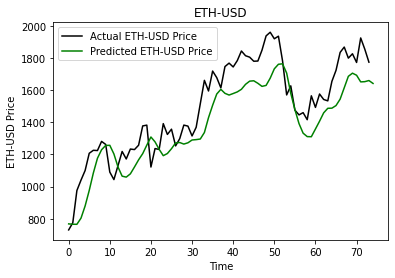

In [ ]:
plt.plot(actual_prices, color="black", label=f"Actual {crypto} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {crypto} Price")
plt.title(f"{crypto}")
plt.xlabel('Time')
plt.ylabel(f"{crypto} Price")
plt.legend()
plt.show()

Predict Next Day

In [ ]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

Prediction:[[1641.597]]
